# Python assignment-BCB546X
Mahsa Askary Hemmat
11/27/2019


## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work

In [110]:
# below lines import the 'X' library and renames it as 'Y' for when it is called later, these are the libraries that
# we need for the code
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import numpy as np 
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import matplotlib.pyplot as plt    
import seaborn as sns   

# FUNCTIONS
## 1- Getting the sequences and descripting the following function

In [111]:
def get_sequences_from_file(fasta_fn): #First it gets a fasta file as the input
    sequence_data_dict = {} #Creats an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #a for loop that takes the fasta file and a fasta string
# and runs the below command for each record
        description = record.description.split()#save the description for each record
        species_name = description[1] + " " + description[2]#use the description to create the species names
        sequence_data_dict[species_name] = record.seq #add the species names whcih contains the description 
#to the dictionary 
    return(sequence_data_dict)#returns the dictionary which contains the description and species names


In [112]:
# testing the get_sequences_from_file function
penguins_dict = get_sequences_from_file(fasta_fn='penguins_cytb.fasta')
penguins_dict

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

## 2-String translation

- The follwoing function translates sequences
- All sequences start at codon position 1
- Used Dr. X pseudo-code and suggestions


In [113]:
def translate_Seq(string_nucleotides): # Defining a function that its input is a string of nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # Reading the translation table
    aa_seq_string ="" # Creates an empty string
    for i in range(0, len(string_nucleotides), 3):   # for loop through every 3 characters in string_nucleotides 
    
    
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break        # IMPORTANT: check to see if the sequence has a stop codon
            
        aminoacid = mito_table.forward_table[codon]  # print the aminoacid
        
        aa_seq_string += aminoacid  # add the aa to aa_seq_string
        
    return(aa_seq_string) #returns amino acid sequence

    

In [114]:
# testing the translate_Seq function
translate_Seq(string_nucleotides= 'ATGTATCTAGCAGTACGATACGGGATTAGG')

'MYLAVRYGI'

## 3- Better way to write a translation function

In [115]:
# uses biopython
def alt_translate_function(string_nucleotides): # Defining a function that its input is a string of nucleotides
    code_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna) # Takes the input, makes it a Seq object, 
    # as a IUPAC alphabet for Seq reference.
    alt_aa_string = code_dna.translate(table = "Vertebrate Mitochondrial", to_stop = True) # translate using 
    # biopython functions
    return (alt_aa_string) # returns amino acid sequence


In [116]:
# Testing the alt_translate_function
alt_translate_function('ATGTATCTAGCAGTACGATACGGGATTAGG')

Seq('MYLAVRYGI', IUPACProtein())

In [117]:
def compute_mw_Seq(Seq_object): # defining a function called 'compute_mw_Seq' 
    # requiring an argument called 'Seq_object' for the input file
    my_seq = translate_Seq(Seq_object)    # uses the 'translate_Seq' function created above 
    # to translate the input sequence and assigns the new string of amino acids to 'my_seq'
    analysed_seq = ProteinAnalysis(str(my_seq))    # uses the ProteinAnalysis from Biopython which 
    # converts the input as a string 'my_seq' 
    # to a Seq object while validating it is a protein sequence and assigns the output to 'analysed_seq'
    molecular_weight = analysed_seq.molecular_weight()    # uses the .molecular_weight() from Biopython to calculate 
    # the molecular weight of 'analysed_seq' from above and assigns it to 'molecular_weight'
    return molecular_weight    # returns the 'molecular_weight'

In [118]:
# Testing the above function
compute_mw_Seq('ATGCGCGTGAATTTGGATGCATGCTAGTAATATCGTTAC')

921.0964000000001

## 4-GC CONTENT ANALYSIS FUNCTION
A function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [119]:
def GC_contents(string_nucleotides): # Defines a function that gets a string of nucleotidea as input file and
    # calculates the GC content
    content = GC(string_nucleotides) ## use biopython processess to get GC content
    return content # Returns the GC content

In [120]:
# Testing the GC_contents function
GC_contents('ATGGGTCCTAGTCGTAGCGTACGTTTAACGTGCGATGGGTTTCGTACGT')

51.02040816326531

# Main

In [121]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # Getting the sequences from a FASTA file and assign it to
# an object

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species) # List of species


## 6-Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content. Set the value to 'NaN' to indicate that these cells are currently empty.

In [122]:
penguins_df['molecular_weight'] = np.nan    # creates a column called 'molecular_weight' 
# in the 'penguins_df' dataframe and assigns NaN as values for the column
penguins_df['GC_content'] = np.nan    # creates a column called 'GC_content' 
# in the 'penguins_df' dataframe and assigns NaN as values for the column
penguins_df    # prints the 'penguins_df' dataframe with the new columns of all NaN

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## 7- Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [123]:
for key, value in penguins_dict.items():    # starting a For Loop that will iterate through the 'penguins_dict' dictionary
    penguins_df.loc[penguins_df.species == key, 'molecular_weight'] = compute_mw_Seq(value)    # uses the 'compute_mw_Seq' created above to translate and then calculate the molecular weight of each vaule (nucleotide sequence) in the dictionary and the fills in the output for the corresponding key in the 'penguins_df' dataframe under the 'molecular_weight' column
    penguins_df.loc[penguins_df.species == key, 'GC_content'] = GC_contents(value)    # uses the 'compute_mw_Seq' created above to calculate the GC content of each vaule (nucleotide sequence) in the dictionary and the fills in the output for the corresponding key in the 'penguins_df' dataframe under the 'GC_content' column
penguins_df    # prints the 'penguins_df' dataframe with filled in values for 'molecular_weight' and 'GC_content'

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


## 8-Plot a bar-chart of the mass with the x-axes labeled with species names.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

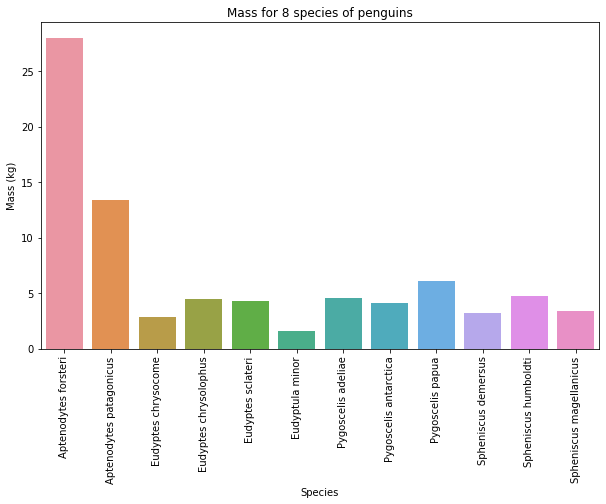

In [124]:
fig, ax = plt.subplots(figsize=(10,6))    # defines the size of the following figure
sns.barplot(data=penguins_df, x='species', y='mass')    # uses the .barplot() function from seaborn to generate a 
#barplot using the 'penguins_df' dataframe  with the 'species' collumn on the x-axis and the 'mass' variable on 
#the y-axis
ax.set(xlabel='Species', ylabel='Mass (kg)')    # renames the axes
plt.title("Mass for 8 species of penguins")    # renames the title of the graph
plt.xticks(rotation=90)  # rotates the bar lables on the x-axis; adapted from 
#https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

### *Q1* What is the smallest penguin species? Eudyptula minor
### *Q2* What else is interesting about this species? Little penguins live an average of 6 years.
https://animaldiversity.org/accounts/Eudyptula_minor/

## 9-Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

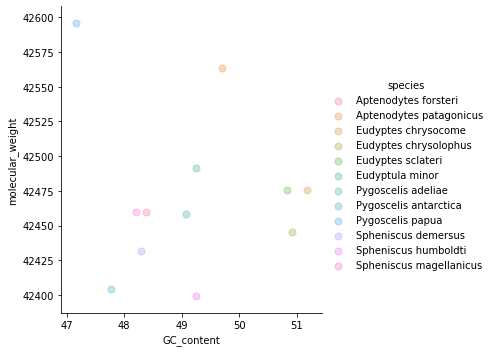

In [125]:
sns.lmplot("GC_content", "molecular_weight", data=penguins_df, fit_reg=False, 
           scatter_kws={'alpha':0.3,"s": 50}, hue='species') # scatter plot of mol_weight against GC, 
# color sorted by species

## 10- Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [126]:

penguins_df.to_csv('penguins_mass_cytb.csv')    # saves the 'penguins_df' dataframe to a csv in the working directory 
# called 'penguins_mass_cytb.csv'

## Bonus: I found the following script on the internet for calculating the number of each nucleotide in each sequence and length of sequence

In [5]:
"""
BioPython Example File - Using FASTA nucleotide files


It has been tested on BioPython 1.43 with Python 2.3, and is suitable
for Windows, Linux etc.

See associated webpage:

http://www2.warwick.ac.uk/fac/sci/moac/currentstudents/peter_cock/python/fasta_n/

Peter Cock, MOAC, University of Warwick, UK
17 April 2007
"""

#Open a FASTA input file of gene nucleotides sequences:
input_file = open('penguins_cytb.fasta')


#This is a universal format, you can read it
#with any text editor - Microsoft Excel is
#also a good choice.
output_file = open('nucleotide_counts.tsv','w')

#We will now write a header line to our output file.
#
#We must write \t to mean a tab, and \n to mean
#an end of line (new line) character.
#
#i.e.
#Gene (tab) A (tab) C (tab) G (tab) T (tab) Length%
output_file.write('Gene\tA\tC\tG\tT\tLength\n')


#Get SeqIO to read this file in "fasta" format,
#and use it to see each record in the file one-by-one
for cur_record in SeqIO.parse(input_file, "fasta") :
    #Because we used the Bio.SeqIO parser, each record
    #is SeqRecord object which includes name and seq
    #properties.
    gene_name = cur_record.name

    #Just like a string in python, a Biopython sequence
    #object has a 'count' method we can use:
    A_count = cur_record.seq.count('A')
    C_count = cur_record.seq.count('C')
    G_count = cur_record.seq.count('G')
    T_count = cur_record.seq.count('T')

    #We would also like to know the number of nucleotides
    #in this gene (which should add up to the four
    #base counts, if there are no unknown bases, N)
    length = len(cur_record.seq)




    #Finally, we are going to save this information
    #as a single tab separated line in our output file.
    #
    #As before (when we wrote the header line), we must
    #write \t to mean a tab, and \n to mean an end of line
    #(new line) character.
    #
    #We are using the string formatting (or interpolation)
    # operator % so the %s means insert a string,
    #while %i means insert an integer and %f a floating
    #point (non-integer).
    #
    #The \ character means this command continues on the
    #next line
    output_line = '%s\t%i\t%i\t%i\t%i\t%f\n' % \
    (gene_name, A_count, C_count, G_count, T_count, length)

    # 
    output_file.write(output_line)

#Now we have finished all the genes, we can close the output file:
output_file.close()

#and close the input file:
input_file.close()
